In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [40]:
df = pd.read_csv('train_modified_fare.csv' , usecols=['Age','Fare','SibSp','Parch','Survived'])

In [41]:
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [42]:
df['family'] = df['SibSp'] + df['Parch']

In [43]:
df.drop(columns=['SibSp', 'Parch'] ,inplace=True)

In [44]:
df.head()

,Survived,Age,Fare,family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      846 non-null    float64
 3   family    891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [46]:
df.isnull().mean()*100

Survived     0.000000
Age         19.865320
Fare         5.050505
family       0.000000
dtype: float64

In [47]:
X = df.drop(columns=['Survived'])
y= df['Survived']

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size =0.2 , random_state= 2)

In [53]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [56]:
X_train.isnull().mean()*100

Age       20.786517
Fare       5.056180
family     0.000000
dtype: float64

In [61]:
mean_age =X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare =X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [73]:
X_train['Age_medain'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_medain'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [74]:
X_train.sample(5)

,Age,Fare,family,Age_medain,Age_mean,Fare_medain,Fare_mean
629,NaN,7.7333,0,28.75,29.785904,7.7333,7.7333
346,40.0,13.0000,0,40.00,40.000000,13.0000,13.0000
96,71.0,34.6542,0,71.00,71.000000,34.6542,34.6542
295,NaN,27.7208,0,28.75,29.785904,27.7208,27.7208
748,19.0,53.1000,1,19.00,19.000000,53.1000,53.1000


In [75]:
print("orignal Age variable variance : " , X_train['Age'].var())
print("Age variance after median imputation : " , X_train['Age_median'].var())
print("Age variance after mean imputation : " , X_train['Age_mean'].var())

print("orignal Fare variable variance : " , X_train['Fare'].var())
print("Fare variance after median imputation : " , X_train['Fare_median'].var())
print("Fare variance after mean imputation : " , X_train['Fare_mean'].var())

orignal Age variable variance :  204.3495133904614


KeyError: 'Age_median'

In [76]:
X_train['Age_median'] = X_train['Age'].fillna(X_train['Age'].median())
X_train['Age_mean'] = X_train['Age'].fillna(X_train['Age'].mean())

# For Fare
X_train['Fare_median'] = X_train['Fare'].fillna(X_train['Fare'].median())
X_train['Fare_mean'] = X_train['Fare'].fillna(X_train['Fare'].mean())

# Now print the variances
print("original Age variable variance: ", X_train['Age'].var())
print("Age variance after median imputation: ", X_train['Age_median'].var())
print("Age variance after mean imputation: ", X_train['Age_mean'].var())

print("original Fare variable variance: ", X_train['Fare'].var())
print("Fare variance after median imputation: ", X_train['Fare_median'].var())
print("Fare variance after mean imputation: ", X_train['Fare_mean'].var())









original Age variable variance:  204.3495133904614
Age variance after median imputation:  161.9895663346054
Age variance after mean imputation:  161.81262452718673
original Fare variable variance:  2470.643159145908
Fare variance after median imputation:  2361.7349479676345
Fare variance after mean imputation:  2345.547302986622


In [77]:
X_train.cov()

,Age,Fare,family,Age_medain,Age_mean,Fare_medain,Fare_mean,Age_median,Fare_median
Age,204.349513,73.136773,-6.498901,204.349513,204.349513,73.064741,70.091563,204.349513,73.064741
Fare,73.136773,2470.643159,17.347633,60.812684,58.461555,2470.643159,2470.643159,60.812684,2470.643159
family,-6.498901,17.347633,2.735252,-5.112563,-5.146106,16.638916,16.469272,-5.112563,16.638916
Age_medain,204.349513,60.812684,-5.112563,161.989566,161.812625,60.128403,57.733560,161.989566,60.128403
Age_mean,204.349513,58.461555,-5.146106,161.812625,161.812625,57.855765,55.501477,161.812625,57.855765
Fare_medain,73.064741,2470.643159,16.638916,60.128403,57.855765,2361.734948,2345.547303,60.128403,2361.734948
Fare_mean,70.091563,2470.643159,16.469272,57.733560,55.501477,2345.547303,2345.547303,57.733560,2345.547303
Age_median,204.349513,60.812684,-5.112563,161.989566,161.812625,60.128403,57.733560,161.989566,60.128403
Fare_median,73.064741,2470.643159,16.638916,60.128403,57.855765,2361.734948,2345.547303,60.128403,2361.734948


In [78]:
X_train.corr()

,Age,Fare,family,Age_medain,Age_mean,Fare_medain,Fare_mean,Age_median,Fare_median
Age,1.000000,0.095289,-0.299113,1.000000,1.000000,0.097968,0.094332,1.000000,0.097968
Fare,0.095289,1.000000,0.209196,0.095217,0.091600,1.000000,1.000000,0.095217,1.000000
family,-0.299113,0.209196,1.000000,-0.242883,-0.244610,0.207019,0.205614,-0.242883,0.207019
Age_medain,1.000000,0.095217,-0.242883,1.000000,0.999454,0.097212,0.093662,1.000000,0.097212
Age_mean,1.000000,0.091600,-0.244610,0.999454,1.000000,0.093589,0.090090,0.999454,0.093589
Fare_medain,0.097968,1.000000,0.207019,0.097212,0.093589,1.000000,0.996567,0.097212,1.000000
Fare_mean,0.094332,1.000000,0.205614,0.093662,0.090090,0.996567,1.000000,0.093662,0.996567
Age_median,1.000000,0.095217,-0.242883,1.000000,0.999454,0.097212,0.093662,1.000000,0.097212
Fare_median,0.097968,1.000000,0.207019,0.097212,0.093589,1.000000,0.996567,0.097212,1.000000


<Axes: >

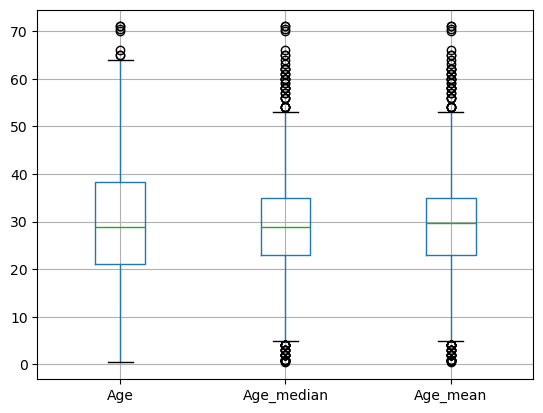

In [81]:
X_train[['Age' , 'Age_median' , 'Age_mean']].boxplot()

In [84]:
X_train[['Fare' , 'Fare_median' , 'Fare_mean']].boxplot()

<Axes: >

In [85]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size =0.2 , random_state= 2)

In [89]:
imputer1 = SimpleImputer(strategy = 'median')
imputer2 = SimpleImputer(strategy = 'mean')

In [92]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2' ,imputer2 ,['Fare'])
],remainder = 'passthrough')

In [94]:
trf.fit(X_train)

C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [98]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [99]:
trf.named_transformers_['imputer2'].statistics_

array([32.85025207])

SpecificationError: nested renamer is not supported

In [101]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [102]:
X_train

array([[ 40.        ,  32.85025207,   0.        ],
       [  4.        ,  16.7       ,   2.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 28.75      , 221.7792    ,   0.        ],
       [ 28.75      ,  25.925     ,   0.        ]])